In [1]:
from everywhereml.data import Dataset
from everywhereml.data.collect import SerialCollector

/home/harw/Documents/imu_venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:

imu_dataset = Dataset.from_csv(
    'imu.csv', 
    name='ContinuousMotion', 
    target_name_column='target_name'
)

In [18]:
imu_dataset.describe()

,ax,ay,az,gx,gy,gz,roll,pitch,target
count,24327.000000,24327.000000,24327.000000,24327.000000,24327.000000,24327.000000,24327.000000,24327.000000,24327.000000
mean,-305.394623,-76.935586,1964.340198,18.138611,-162.996876,0.070868,19.854436,1.355545,0.494594
std,898.462449,2821.838954,2568.440973,6914.550509,1156.761875,1375.058798,51.986131,13.167592,0.499981
min,-5087.000000,-16171.000000,-9877.000000,-23900.000000,-8269.000000,-9429.000000,-92.120000,-29.960000,0.000000
25%,-954.000000,-1240.000000,794.500000,-4023.000000,-522.000000,-246.000000,-9.610000,-8.660000,0.000000
50%,-265.000000,230.000000,2915.000000,61.000000,-146.000000,106.000000,11.820000,-3.030000,0.000000
75%,393.000000,1672.500000,3723.000000,2899.500000,321.000000,701.000000,39.475000,13.580000,1.000000
max,8403.000000,6906.000000,9775.000000,27612.000000,6819.000000,5613.000000,159.880000,35.580000,1.000000


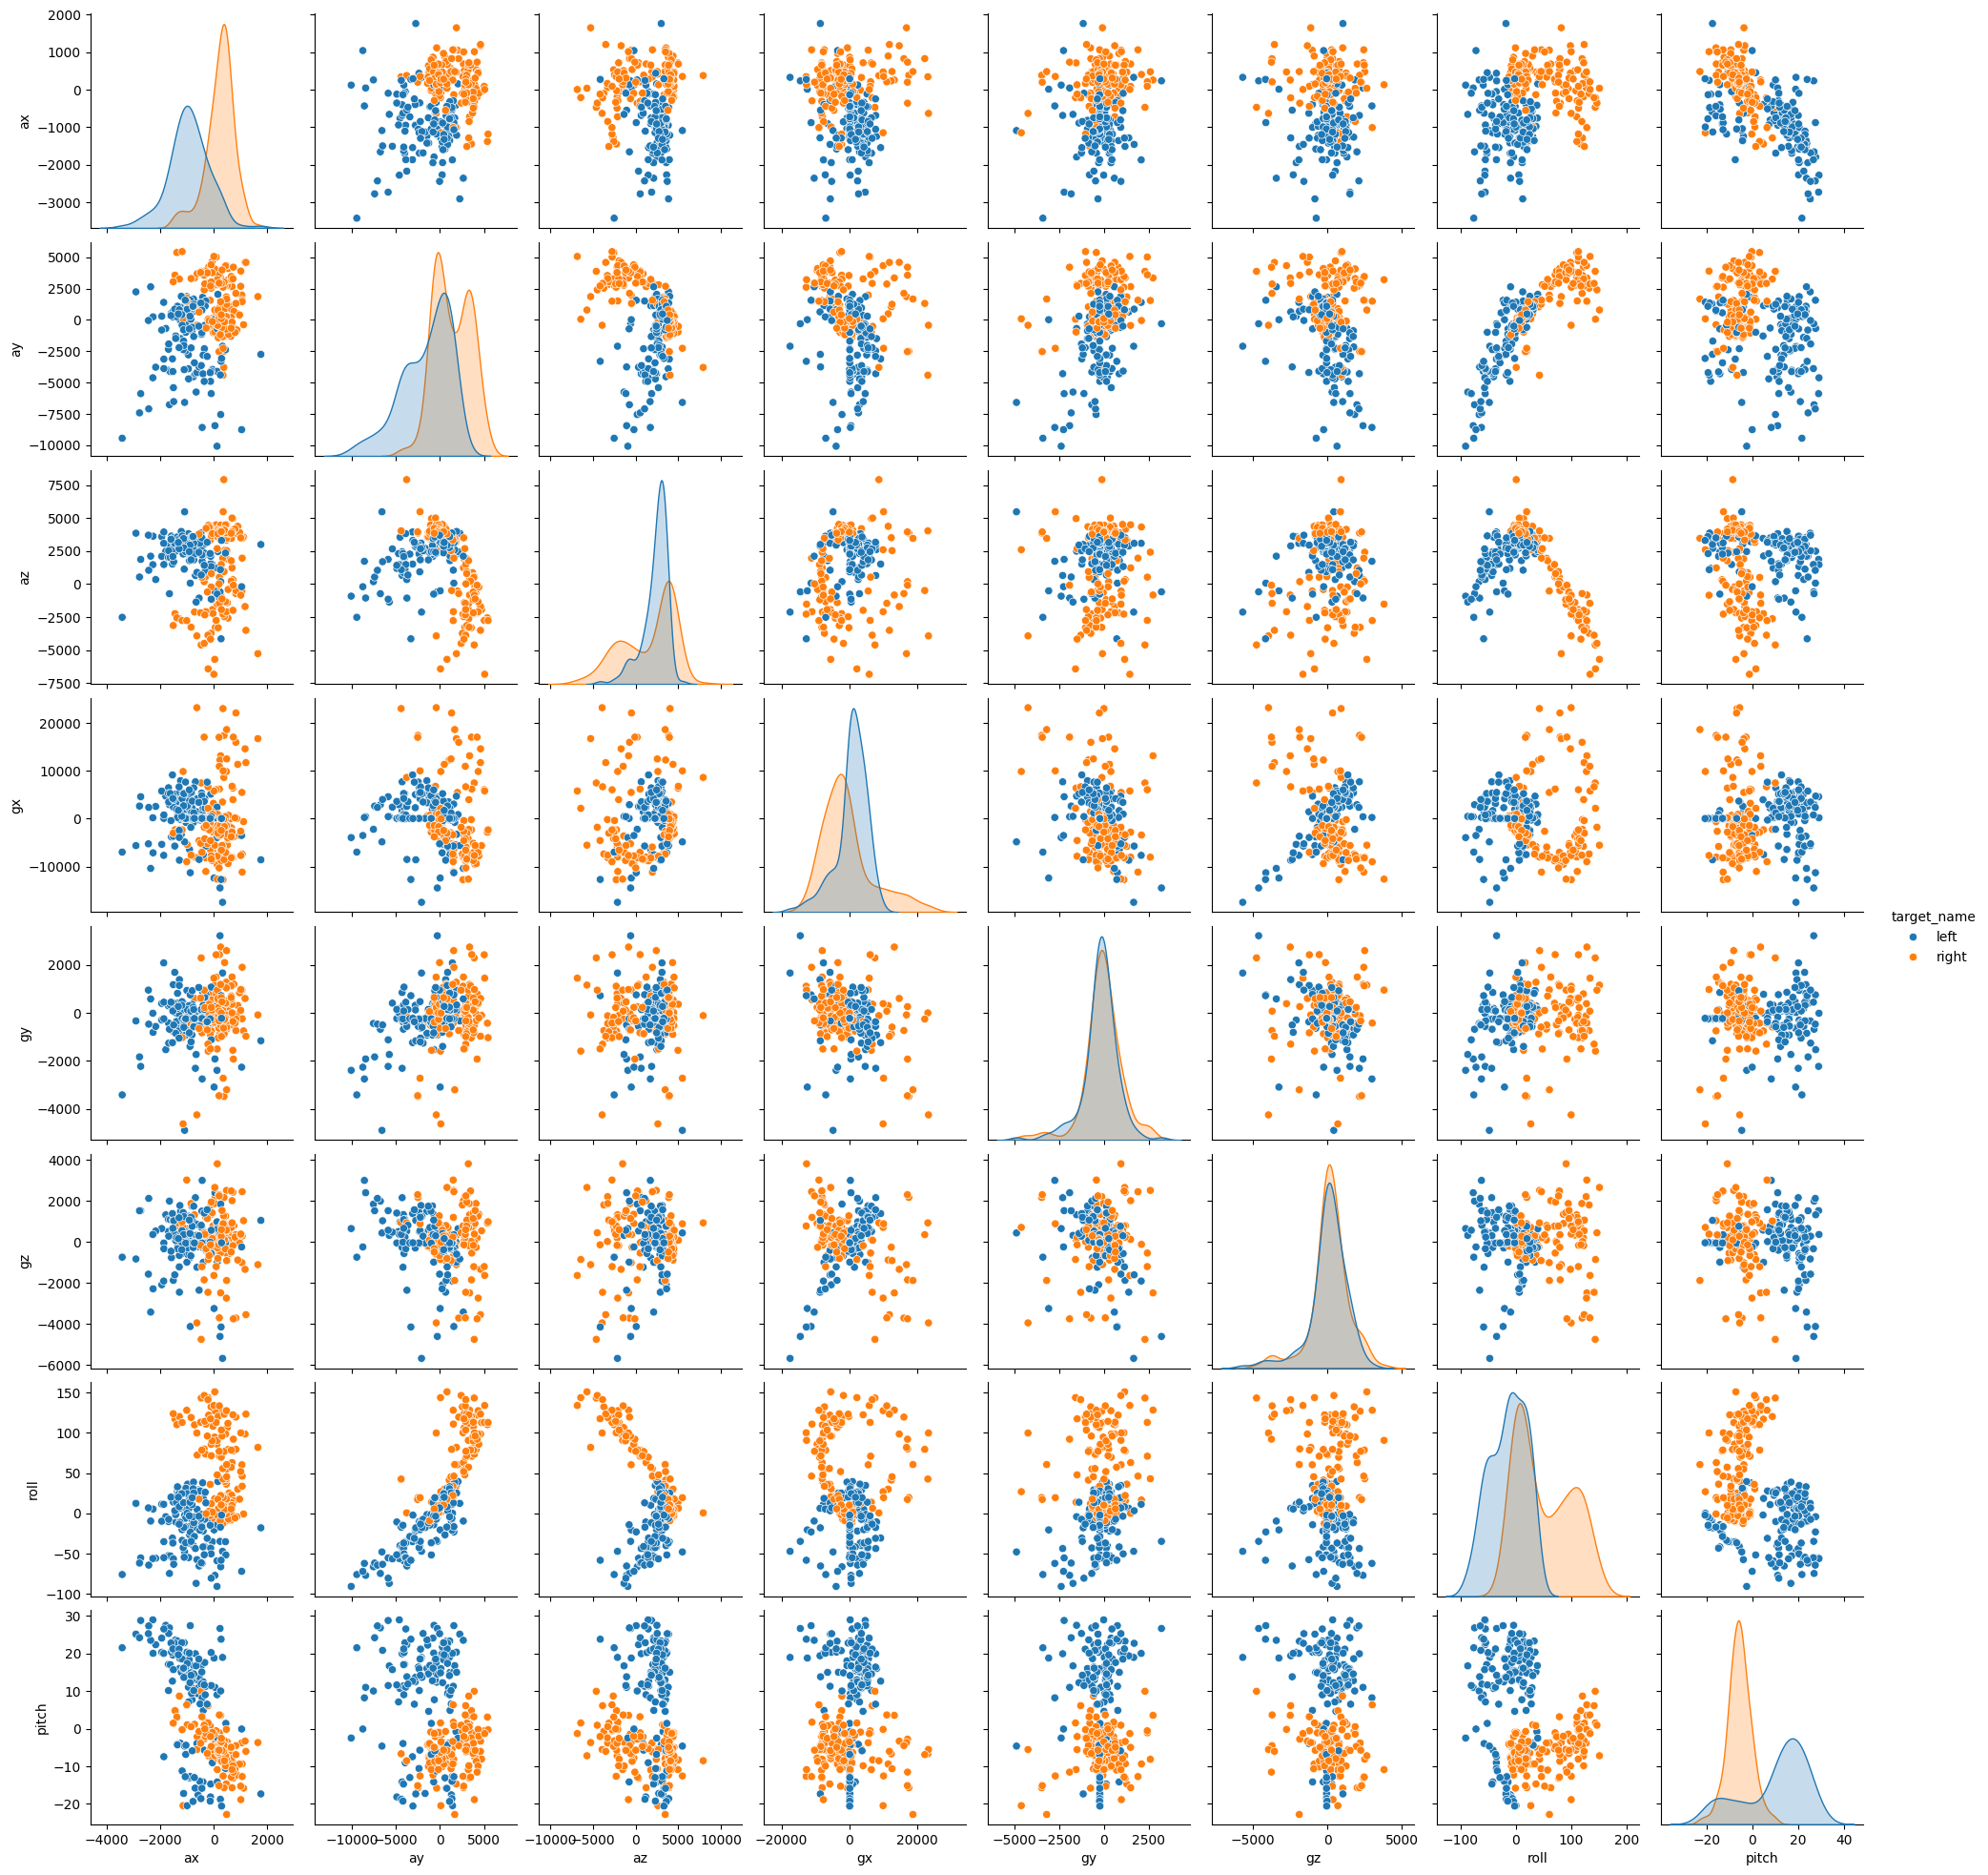

In [19]:
imu_dataset.plot.features_pairplot(n=300)

In [22]:
from everywhereml.preprocessing import Pipeline, MinMaxScaler, Window, SpectralFeatures

# this is the frequency of your sensor
# change according to your hardware
sampling_frequency = 90
mean_gesture_duration_in_millis = 1000
window_length = sampling_frequency * mean_gesture_duration_in_millis // 1000

imu_pipeline = Pipeline(name='ContinousMotionPipeline', steps=[
    MinMaxScaler(),
    Window(length=window_length, shift=0.2),
    SpectralFeatures(order=2)
])

In [23]:
from pprint import pprint

pprint(imu_pipeline['SpectralFeatures'][0].feature_names)

['maximum',
 'minimum',
 'abs_maximum',
 'abs_minimum',
 'mean',
 'abs_energy',
 'mean_abs_change',
 'cid_ce',
 'std',
 'var',
 'count_above_mean',
 'count_below_mean',
 'first_position_of_max',
 'first_position_of_min',
 'max_count',
 'min_count',
 'has_large_std',
 'skew',
 'kurtosis',
 'variation_coefficient']


In [24]:
imu_dataset.apply(imu_pipeline)

In [25]:
imu_dataset.describe()

,ax_maximum,ax_minimum,ax_abs_maximum,ax_abs_minimum,ax_mean,ax_abs_energy,ax_mean_abs_change,ax_cid_ce,ax_std,ax_var,...,pitch_count_below_mean,pitch_first_position_of_max,pitch_first_position_of_min,pitch_max_count,pitch_min_count,pitch_has_large_std,pitch_skew,pitch_kurtosis,pitch_variation_coefficient,target
count,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,...,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000
mean,0.464841,0.259118,0.464841,0.259118,0.354361,0.130009,0.011161,0.000702,0.040064,0.002010,...,44.258352,40.952487,46.989607,13.907944,13.697105,0.838159,0.046056,1.559872,0.106147,0.494432
std,0.095736,0.075239,0.095736,0.075239,0.049284,0.034021,0.006190,0.001563,0.020123,0.002070,...,11.062033,32.298282,31.735041,13.566045,13.917354,0.368442,0.627012,1.500616,0.079169,0.500155
min,0.279021,0.000000,0.279021,0.000000,0.226523,0.052720,0.001000,0.000002,0.001528,0.000002,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-2.552240,0.000000,0.000726,0.000000
25%,0.410749,0.214529,0.410749,0.214529,0.313992,0.101242,0.006929,0.000159,0.024534,0.000602,...,38.000000,8.000000,17.000000,6.000000,5.000000,1.000000,-0.135927,0.000000,0.049016,0.000000
50%,0.455597,0.262342,0.455597,0.262342,0.360479,0.133411,0.010289,0.000344,0.036648,0.001343,...,45.000000,39.000000,49.000000,10.000000,9.000000,1.000000,0.000000,1.648574,0.083108,0.000000
75%,0.498962,0.315864,0.498962,0.315864,0.398338,0.159991,0.014221,0.000719,0.051871,0.002691,...,52.000000,71.000000,78.000000,17.000000,18.000000,1.000000,0.278060,2.325079,0.144044,1.000000
max,1.000000,0.414752,1.000000,0.414752,0.466535,0.219527,0.055603,0.017416,0.116004,0.013457,...,75.000000,89.000000,89.000000,90.000000,90.000000,1.000000,2.836145,10.210215,0.508904,1.000000


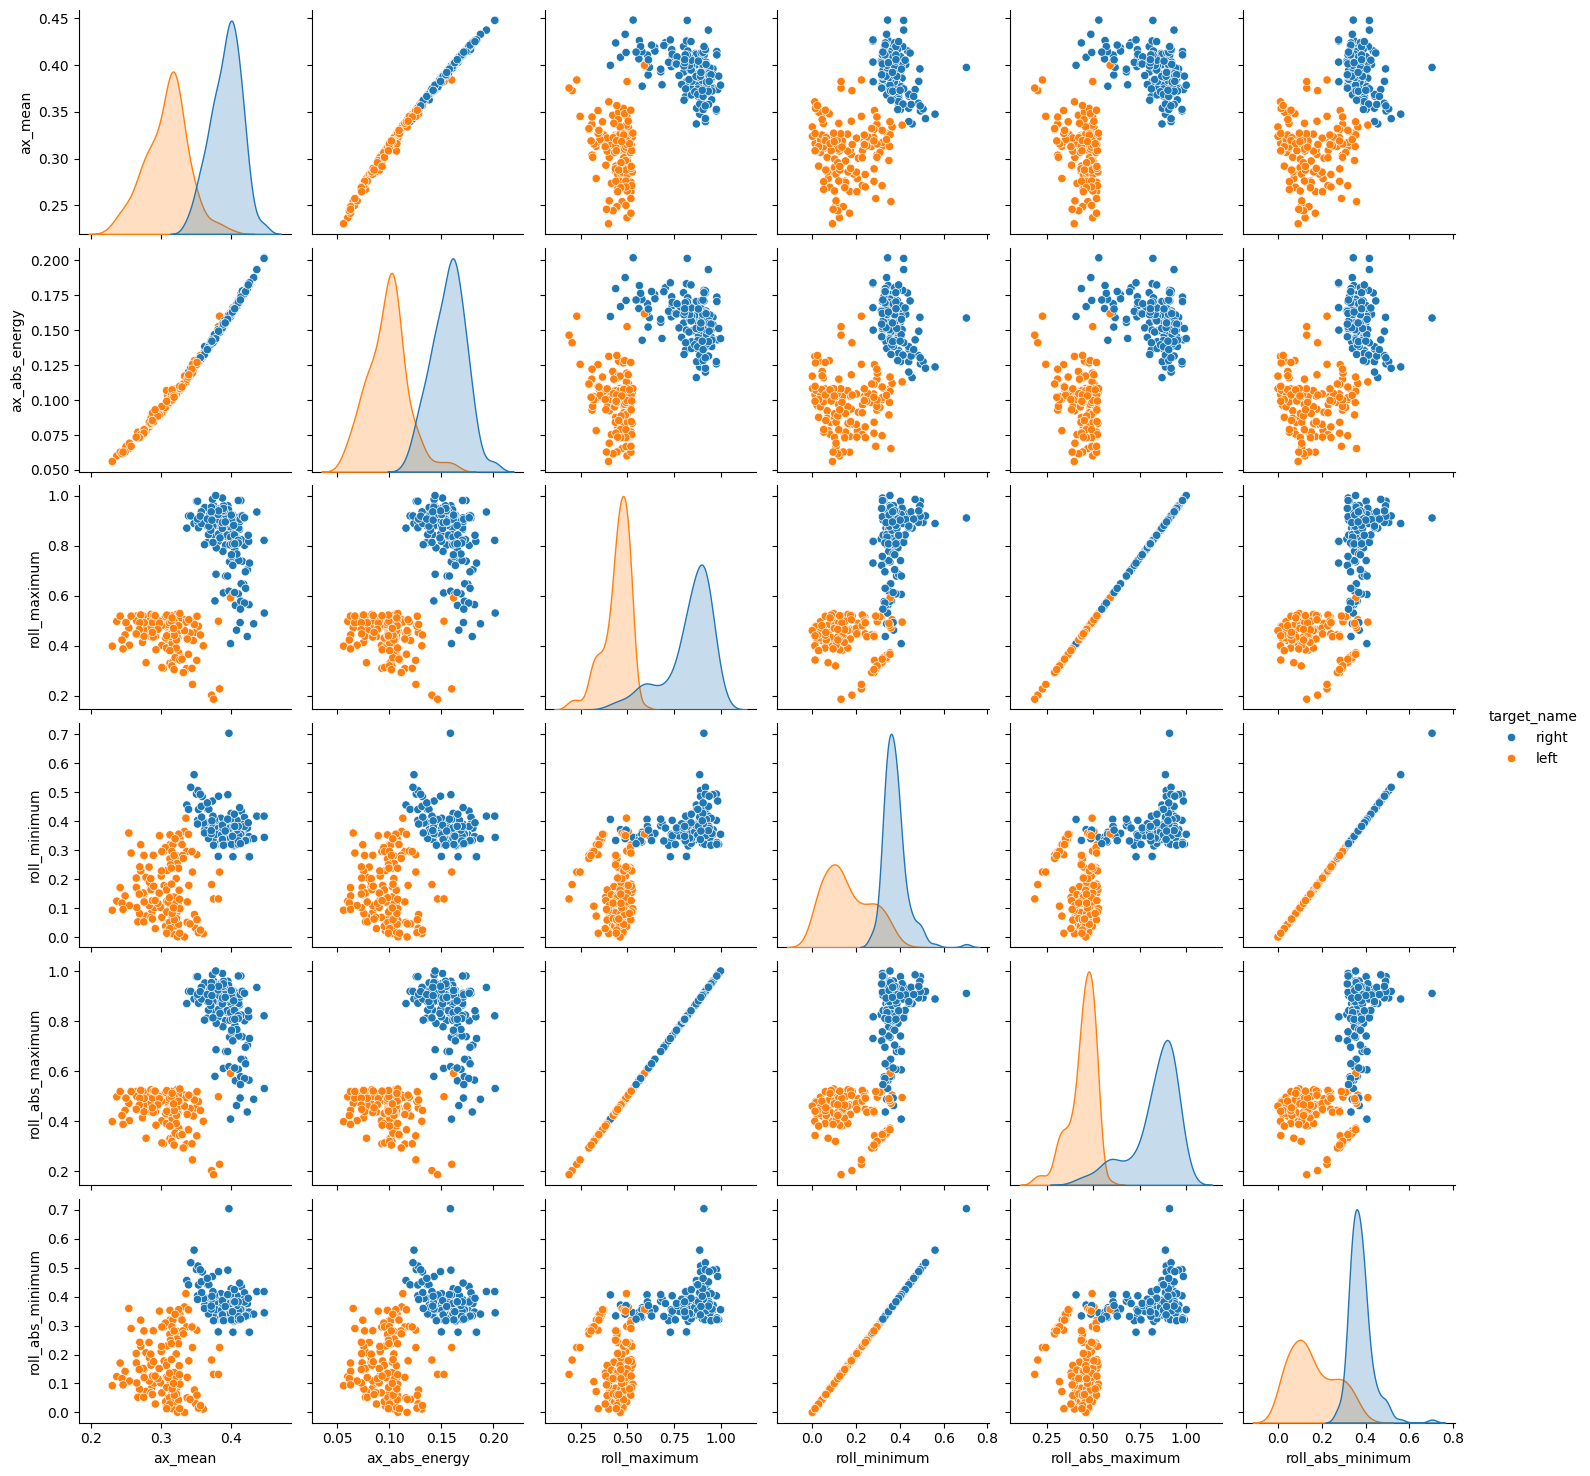

In [26]:
imu_dataset.plot.features_pairplot(n=300, k=6)

## T

In [27]:
from everywhereml.sklearn.ensemble import RandomForestClassifier

imu_classifier = RandomForestClassifier(n_estimators=20, max_depth=20)
imu_train, imu_test = imu_dataset.split(test_size=0.3)
imu_classifier.fit(imu_train)

print('Score on test set: %.2f' % imu_classifier.score(imu_test))

Score on test set: 1.00


In [13]:
from everywhereml.sklearn.ensemble import RandomForestClassifier

imu_classifier = RandomForestClassifier(n_estimators=50, max_depth=40)
imu_train, imu_test = imu_dataset.split(test_size=0.3)
imu_classifier.fit(imu_train)

print('Score on test set: %.2f' % imu_classifier.score(imu_test))

Score on test set: 0.99


In [28]:
print(imu_pipeline.to_arduino_file(
    'Pipeline.h', 
    instance_name='pipeline'
))

#ifndef UUID139747268226224
#define UUID139747268226224

#include <cstring>


namespace ContinousMotionPipeline {

    
        #ifndef UUID139747268217344
#define UUID139747268217344

/**
  * MinMaxScaler(low=0, high=1)
 */
class Step0 {
    public:

        /**
         * Transform input vector
         */
        bool transform(float *x) {
            
    for (uint16_t i = 0; i < 8; i++) {
        x[i] = (x[i] - offset[i]) * scale[i] + 0;

        if (x[i] < 0) x[i] = 0;
        else if (x[i] > 1) x[i] = 1;
    }

    return true;


            return true;
        }

    protected:
        
    float offset[8] = {-5087.00000000000f, -16171.00000000000f, -9877.00000000000f, -23900.00000000000f, -8269.00000000000f, -9429.00000000000f, -92.12000000000f, -29.96000000000f};
    float scale[8] = {0.00007412898f, 0.00004333319f, 0.00005088541f, 0.00001941295f, 0.00006627784f, 0.00006648052f, 0.00396825397f, 0.01525785780f};

};



#endif
    
        #ifndef UUID139747268228816
#define U

In [29]:
print(imu_classifier.to_arduino_file(
    'Classifier.h', 
    instance_name='forest', 
    class_map=imu_dataset.class_map
))

#ifndef UUID139747296830672
#define UUID139747296830672

/**
  * RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_name=RandomForestClassifier, class_weight=None, criterion=gini, estimator=DecisionTreeClassifier(), estimator_params=('criterion', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'min_weight_fraction_leaf', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'random_state', 'ccp_alpha', 'monotonic_cst'), max_depth=20, max_features=sqrt, max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, monotonic_cst=None, n_estimators=20, n_jobs=None, num_outputs=2, oob_score=False, package_name=everywhereml.sklearn.ensemble, random_state=None, template_folder=everywhereml/sklearn/ensemble, verbose=0, warm_start=False)
 */
class RandomForestClassifier {
    public:

        /**
         * Predict class from features
         */
        int predict(float *x) {
            int predic